In [76]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.io import loadmat
import glob
from scipy import signal
from scipy.fftpack import fft, ifft
from scipy.signal import butter, lfilter
import mne

### Setup data information

In [77]:
emotion_label = ['neutral', 'sad', 'fear', 'happy']
session1_label = [1,2,3,0,2,0,0,1,0,1,2,1,1,1,2,3,2,2,3,3,0,3,0,3]
session2_label = [2,1,3,0,0,2,0,2,3,3,2,3,2,0,1,1,2,1,0,3,0,1,3,1]
session3_label = [1,2,2,1,3,3,3,1,1,2,1,0,2,3,3,0,2,3,0,0,2,0,1,0]
# location = "../SEED_IV/eeg_raw_data"


### Import files

In [78]:
files = glob.glob("../SEED_IV/eeg_raw_data/1/1_20160518.mat")
# files = glob.glob(location+"/*/*.mat")
files

['../SEED_IV/eeg_raw_data/1/1_20160518.mat']

In [79]:
subjects = [loadmat(files[0])]
# for file in files:


### Create MNE object

In [80]:
target_channels = [15, 23, 24, 32, 33, 41]
channel_mapping = ['FT7','FT8','T7','T8','TP7','TP8']
ch_types = ['eeg'] * 6
sampling_freq = 1000

info = mne.create_info(channel_mapping, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage('standard_1020')



<Info | 8 non-empty values
 bads: []
 ch_names: FT7, FT8, T7, T8, TP7, TP8
 chs: 6 EEG
 custom_ref_applied: False
 dig: 9 items (3 Cardinal, 6 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 6
 projs: []
 sfreq: 1000.0 Hz
>

In [94]:
data = np.array(subjects)
trial_no = 0
session1_label[trial_no]
trial = data[trial_no]['cz_eeg1']
channel = trial[target_channels[0]]
channel2 = trial[target_channels[1]]
channel3 = trial[target_channels[2]]
channel4 = trial[target_channels[3]]
channel5 = trial[target_channels[4]]
channel6 = trial[target_channels[5]]

raw_data=np.array([channel,channel2,channel3,channel4,channel5,channel6])
raw_data

array([[30.42817116, 28.10359001, 37.69993782, ..., 12.72559166,
        12.15934753, 13.41104507],
       [17.22574234, 14.7819519 , 28.13339233, ..., 13.14282417,
        17.1661377 , 18.53704453],
       [26.55386925, 30.42817116, 34.66010094, ..., 12.18914986,
        13.32163811, 11.20567322],
       [15.22898674, 16.39127731, 23.75245094, ..., 12.04013824,
        14.7819519 , 15.7058239 ],
       [21.10004425, 18.53704453, 25.1531601 , ..., 10.34140587,
         9.1791153 ,  7.56978989],
       [14.96076584, 16.59989357, 23.57363701, ..., 12.04013824,
        15.02037048, 14.27531242]])

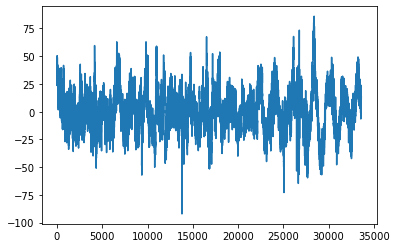

In [95]:
plt.plot(raw_data[0])

In [96]:
info = mne.create_info(ch_names=channel_mapping,
                       ch_types=ch_types,
                       sfreq=sampling_freq)
simulated_raw = mne.io.RawArray(raw_data, info)

Creating RawArray with float64 data, n_channels=6, n_times=33601
    Range : 0 ... 33600 =      0.000 ...    33.600 secs
Ready.


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 3301 samples (3.301 sec)

Effective window size : 2.048 (s)


/var/folders/1t/798ky1kx003ft5w1l83k6v9h0000gn/T/ipykernel_20484/1433769471.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  FFTed_signal.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


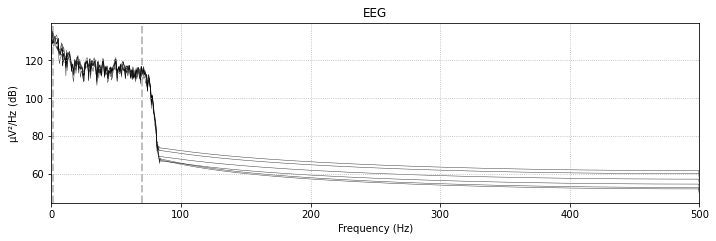

In [99]:
FFTed_signal = simulated_raw.filter(1, 70., fir_design='firwin')
picks = mne.pick_types(FFTed_signal.info, meg=False, eeg=True, eog=False,
                       stim=False)
FFTed_signal.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);

Effective window size : 13.653 (s)


/var/folders/1t/798ky1kx003ft5w1l83k6v9h0000gn/T/ipykernel_20484/3489731737.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  resampled_signal.plot_psd(area_mode='range', picks=picks);


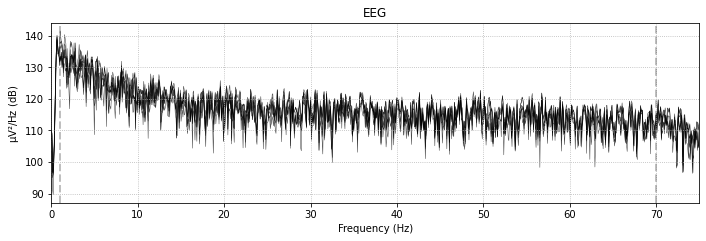

In [101]:
resampled_signal = simulated_raw.resample(150, npad="auto")  # set sampling frequency to 100Hz
picks = mne.pick_types(resampled_signal.info, meg=False, eeg=True, eog=False,
                       stim=False)
resampled_signal.plot_psd(area_mode='range', picks=picks);

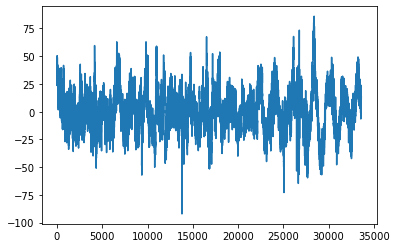

In [105]:
plt.plot(channel)

In [104]:
plt.plot(resampled_signal.get_data(0)[0])

array([ 0.36788772,  2.96121122, -3.20761487, ...,  2.36959572,
        0.85851408, -2.46914785])